# Multi Layer Percepron (MLP)

## Libraries

In [1]:
import torch
import torchvision.datasets as datasets
from torchvision.transforms import ToTensor
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## MLP

<div class="alert alert-block alert-info">
    
The **multi layer perceptron (MLP)** is feedforward neural network composed of successive layers (cf. Figure below).

<img src="files/figures/MLP.jpg" width="600px"/>
 
The dynamics of an MLP is given by the following equations (sample and batch versions):


$$
\begin{array}{ll}
\textbf{sample $\boldsymbol{x}$} & \textbf{batch $\boldsymbol{X}$} \\
\begin{cases}
\boldsymbol{a^{[0]}} ~=~ \boldsymbol{x} & \\
\boldsymbol{z^{[l]}} ~=~ \boldsymbol{W^{[l]}} \boldsymbol{a^{[l-1]}} + \boldsymbol{b^{[l]}}, & l = 1, \dots, L \\
\boldsymbol{a^{[l]}} ~=~ \boldsymbol{\sigma} \left( \boldsymbol{z^{[l]}} \right), & l = 1, \dots, L
\end{cases}
~&~
\begin{cases}
\boldsymbol{A^{[0]}} ~=~ \boldsymbol{X}	\\
\boldsymbol{Z^{[l]}} ~=~ \boldsymbol{W^{[l]}} \boldsymbol{A^{[l-1]}} \oplus \boldsymbol{b^{[l]}}, & l = 1, \dots, L \\
\boldsymbol{A^{[l]}} ~=~ \boldsymbol{\sigma} \big( \boldsymbol{Z^{[l]}} \big), & l = 1, \dots, L
\end{cases}
\end{array}
$$

</div>

- Define a class `MLP()` which takes a list `[n1, n2, ..., nL]` as parameter and creates an MLP with $L$ layers of $n_i$ neurons each, for $i= 1, \dots, L$.
- Initializes the weights matrices $\boldsymbol{W^{[l]}}$ and the bias vectors $\boldsymbol{b^{[l]}}$ randomly from a normal distribution $\mathcal{N}(0, 1)$ (`torch.normal()`).
- The first layer is the input layer and thus has no biases.

In [56]:
class MLP(object):
    
    def __init__(self, sizes):
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [torch.normal(0, 1, size=(n, 1)) for n in sizes[1:]]
        self.weights = [torch.normal(0, 1, size=(n2, n1)) for n1, n2 in zip(sizes[:-1], sizes[1:])]
        
    def forward(self, X):
        
        for W, b in zip(self.weights, self.biases):
            
            X = torch.tanh(torch.mm(W, X) + b)
            
        return X

In [57]:
net = MLP([5, 3, 4, 4, 3])

In [62]:
x1 = torch.tensor([1.1, 2.2, -0.8, 0.7, 3.2])
x2 = torch.tensor([0.1, -2.5, 0.5, 0.3, 5.1])
x3 = torch.tensor([-0.1, 1.1, -0.5, -0.7, -6.4])

X = torch.cat([x1.reshape(-1, 1), x2.reshape(-1, 1), x3.reshape(-1, 1)], dim=1)
X

tensor([[ 1.1000,  0.1000, -0.1000],
        [ 2.2000, -2.5000,  1.1000],
        [-0.8000,  0.5000, -0.5000],
        [ 0.7000,  0.3000, -0.7000],
        [ 3.2000,  5.1000, -6.4000]])

In [58]:
net.forward(X)

tensor([[-0.0871, -0.0290,  0.4656],
        [ 0.8642,  0.9058,  0.8891],
        [ 0.8199,  0.7524,  0.9456]])

- Add a method `forward(X)` which takes a batch of vectors `X` as inputs (2D tensor), and computes the forward pass of the network on this batch.
- For the activation function $\sigma$, take the `tanh`.

## Application to the MNIST Dataset

The **MNIST dataset** consists of handwritten digits. The MNIST classification problem consists in predicting the correct digit represented on an image.

<img src="files/figures/mnist.png" width="600px"/>

- Load the train and test MNIST datasets using the following commands:
```
train = datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
test = datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())
```
Each sample consists of a tensor (the image encoded in black and white), and a label (the digit that it represents).
- Examine the train and test sets.
- Visualize some data samples (tensors) using `plt.imshow()`.

In [93]:
train_set = datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
test_set = datasets.MNIST(root='./data', train=False, download=True, transform=ToTensor())

In [94]:
def display(sample):
    m = sample[0].squeeze()
    plt.imshow(m)
    plt.show()

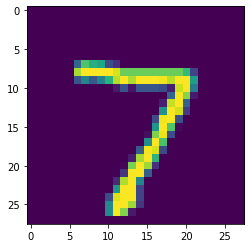

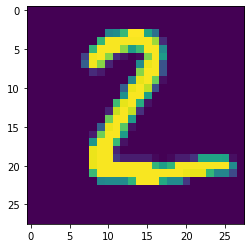

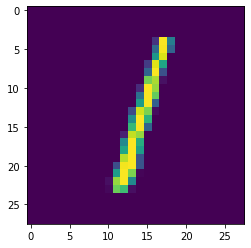

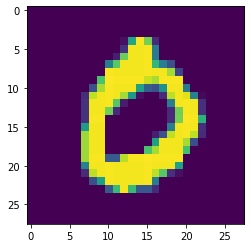

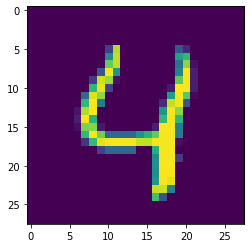

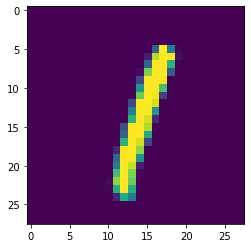

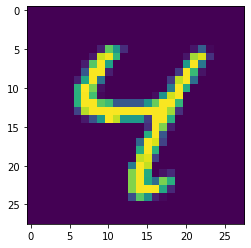

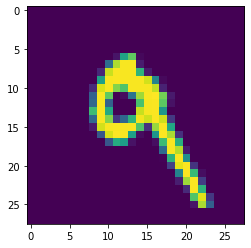

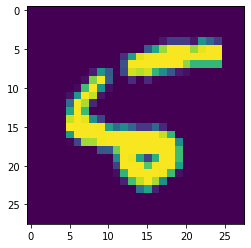

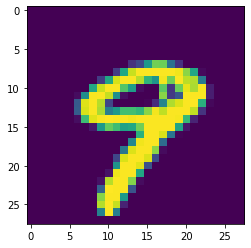

In [95]:
for i in range(10):
    display(test[i])

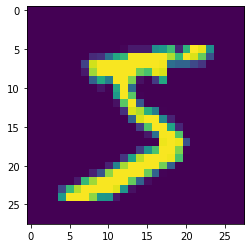

In [96]:
plt.imshow(train[0][0].squeeze())

In [97]:
train[0][1]

5

Each sample is a $28 \times 28$ 2D-tensor representing a handwritten digit. Note that the sample can be "flattened"  into a $28 \cdot 28 = 784$ 1D-vector using the method `flatten()`.

In [99]:
# train[0][0].squeeze().flatten()

A **dataloader** creates batches of samples from a dataset so that they can be passed into a model.
- Create a train and test dataloader using the following commands:
```
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)
```
- Note that dataloaders are not subscriptable.
- Try to catch one batch of the dataloader and examine it.
- Write a function that reshapes a batch of size $64 \times 1 \times 28 \times 28$ into a tensor of size $784 \times 64$.<br>
(use `torch.squeeze()`, `torch.reshape()`, `torch.flatten()`, `torch.transpose()`, etc.)

In [100]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=True)

In [140]:
for b in train_loader:
    break

In [142]:
b[0].shape

torch.Size([64, 1, 28, 28])

In [141]:
b[1]

tensor([5, 1, 4, 3, 6, 4, 9, 5, 7, 0, 1, 3, 4, 3, 6, 3, 4, 1, 3, 1, 4, 5, 4, 8,
        5, 4, 9, 0, 6, 8, 8, 0, 3, 8, 2, 2, 6, 1, 0, 3, 6, 3, 1, 7, 4, 2, 7, 9,
        4, 7, 8, 7, 3, 0, 1, 1, 4, 1, 0, 4, 0, 3, 2, 6])

In [135]:
b = b[0]

In [136]:
b.shape
b = torch.squeeze(b)
print(b.shape)
b = torch.flatten(b, 1, 2).T
b.shape

torch.Size([64, 28, 28])


torch.Size([784, 64])

In [137]:
def reshape_batch(b):
    b = torch.squeeze(b)
    b = torch.flatten(b, 1, 2).T
    
    return b

- Instantiate a 4-layer MLP with the following characteristics:
    - Layer 1 (or input layer): size 784
    - Layer 2: size 128
    - Layer 3: size 128
    - Layer 4 (or output layer): size 10

In [138]:
mlp = MLP([784, 128, 128, 10])

- Pass all train samples through your network batch by batch:<br>
Create a function `process_data(dataloader, network)` that performs this.
- Gather all the outputs into 1 tensor.
- Take the argmax of the outputs to obtain the predictions.
- Get the classification report associated to your predictions and real labels:<br>
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- What can you conclude?

In [144]:
for b in train_loader:

    batch = reshape_batch(b[0])
    outputs = mlp.forward(batch)
    
    break

In [146]:
batch.shape

torch.Size([784, 64])

In [147]:
outputs.shape

torch.Size([10, 64])

In [151]:
outputs[:, 1]

tensor([-0.6434,  0.9992, -1.0000,  1.0000,  0.8862,  0.9881, -0.9986,  0.4109,
        -1.0000,  1.0000])

In [154]:
outputs.shape

torch.Size([10, 64])

In [153]:
torch.argmax(outputs, dim=0)

tensor([6, 9, 0, 0, 0, 2, 0, 0, 3, 4, 1, 7, 3, 1, 2, 3, 2, 1, 0, 1, 0, 1, 0, 4,
        2, 1, 3, 3, 5, 5, 2, 3, 1, 4, 5, 3, 3, 0, 3, 1, 0, 3, 2, 1, 4, 3, 0, 2,
        2, 5, 1, 3, 3, 3, 3, 3, 4, 0, 5, 4, 5, 0, 9, 7])

In [155]:
def process_data(dataloader, network):
    
    labels_l = []
    predictions_l = []
    
    for b in dataloader:
        
        batch = reshape_batch(b[0])
        outputs = network.forward(batch)
        preditions = torch.argmax(outputs, dim=0)
        
        labels = b[1]
        
        predictions_l.extend(preditions)
        labels_l.extend(labels)
    
    return labels_l, predictions_l

In [156]:
labels_l, predictions_l = process_data(train_loader, mlp)

In [160]:
print(classification_report(labels_l, predictions_l))

              precision    recall  f1-score   support

           0       0.08      0.22      0.12      5923
           1       0.18      0.20      0.19      6742
           2       0.08      0.07      0.07      5958
           3       0.21      0.45      0.29      6131
           4       0.12      0.11      0.11      5842
           5       0.07      0.07      0.07      5421
           6       0.13      0.09      0.11      5918
           7       0.13      0.04      0.06      6265
           8       0.04      0.01      0.01      5851
           9       0.08      0.01      0.02      5949

    accuracy                           0.13     60000
   macro avg       0.11      0.13      0.11     60000
weighted avg       0.12      0.13      0.11     60000



**Oviously, the network is untrained, and thus does not preforms better than chance (10%)!**

## Train the MLP via Ridge regression

- Update the **weights of the last layer** only so that they correspond to the solution of a **Ridge regression**.<br>
https://en.wikipedia.org/wiki/Ridge_regression<br>

More precisely:
- Pass the train set through the network and get the predictions of the penultimate layer<br>
(add a method `forward_penultimate()` in the class `MLP`)
- Compute the closed-form solution of the Ridge regression:

$$
{\displaystyle {\widehat {\beta }}_{\text{ridge}}=(X^{T}X+kI_{p})^{-1}X^{T}y}
$$

where
- $X$ is the <span style="color:blue">row-wise concatenation</span> of the penultimate outputs $\boldsymbol{a_i}^{[L-1]}$, for $i = 1, \dots, N$;
- $I_{p}$ is the identity matrix of dim $p$;
- $k > 0$ is a regularization parameter (e.g. $0.1$);
- $y$ is the <span style="color:blue">row-wise concatenation</span> of the 1-hot encoded targets $\boldsymbol{y_i}$, for $i = 1, \dots, N$ (`torch.nn.functional.one_hot()`).
- **Set weights of the last layer $\boldsymbol{W}^{[L]}$ as the solution of the Ridge regression.**
- **Set the bias of the last layer $\boldsymbol{b}^{[L]}$ to $\boldsymbol{0}$.**
- Recompute the predictions associated to the train and test sets.
- Compute the classification reports.
- What can you conclude?

**The results have drastically improved!**
- Note that $\boldsymbol{W}^{[1]}, \boldsymbol{W}^{[2]}$ are kept untrained (randomly initialized).
- Only $\boldsymbol{W}^{[3]}$ is trained via by a **Ridge regression**.
- This suffices to drastically improve the results!